In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
import scrape_yahoo

In [3]:
df = scrape_yahoo.load_summary_csv()

In [4]:
df.iloc[123]

Unnamed: 0                                     0
game_date                       2021-11-05-10:00
away_team                               Brooklyn
home_team                                Detroit
pregame_odds                     -9.5, O/U 209.5
total_over_points                          209.5
total_over_stake_percentage                79.23
total_over_wager_percentage                76.32
total_over_odds                             -110
total_over_decimal_odds                     1.91
total_over_won                             False
total_under_points                         209.5
total_under_stake_percentage               20.77
total_under_wager_percentage               23.68
total_under_odds                            -110
total_under_decimal_odds                    1.91
total_under_won                             True
money_away_odds                             -450
money_away_decimal_odds                     1.22
money_away_stake_percentage                86.88
money_away_wager_per

In [5]:
import collections

money_spread_eq = collections.defaultdict(list)

## use the decimal odds, to avoid silliness
for idx, game in df.iterrows():
    money_spread_eq[game.spread_home_points].append(game.money_home_odds)
    money_spread_eq[game.spread_away_points].append(game.money_away_odds)


TODO? drop ones where the count is less than `n` for a particular spread value

In [6]:

median_money_spread = {}

for spread, money_lines in money_spread_eq.items():
    median_money_spread[spread] = np.median(money_lines)

In [7]:
mms_df = pd.Series(median_money_spread).dropna()

for instance, spread -3.5 has value -160 on the money line but +3.5 has +135 on the money line.

Is the true value -160, implying the underdog is getting screwed, or +135, implying the favorite is getting screwed? it could be either way, right?

you need to convert these to chances of winning, and look at the overround.

In [8]:
mms_df = mms_df[mms_df.index.astype("str").str.endswith(".5")]

In [9]:
print(mms_df.sort_index().to_markdown())

|       |        0 |
|------:|---------:|
| -22.5 |  -5000   |
| -21.5 | -10000   |
| -20.5 |  -5000   |
| -19.5 |  -3000   |
| -18.5 |  -2500   |
| -17.5 |  -2000   |
| -16.5 |  -1600   |
| -15.5 |  -1400   |
| -14.5 |  -1100   |
| -13.5 |  -1000   |
| -12.5 |   -750   |
| -11.5 |   -650   |
| -10.5 |   -550   |
|  -9.5 |   -450   |
|  -8.5 |   -375   |
|  -7.5 |   -300   |
|  -6.5 |   -250   |
|  -5.5 |   -225   |
|  -4.5 |   -190   |
|  -3.5 |   -160   |
|  -2.5 |   -140   |
|  -1.5 |   -120   |
|  -0.5 |   -112.5 |
|   0.5 |   -107.5 |
|   1.5 |    100   |
|   2.5 |    115   |
|   3.5 |    135   |
|   4.5 |    155   |
|   5.5 |    180   |
|   6.5 |    200   |
|   7.5 |    240   |
|   8.5 |    290   |
|   9.5 |    340   |
|  10.5 |    400   |
|  11.5 |    475   |
|  12.5 |    525   |
|  13.5 |    625   |
|  14.5 |    700   |
|  15.5 |    800   |
|  16.5 |    900   |
|  17.5 |   1000   |
|  18.5 |   1100   |
|  19.5 |   1200   |
|  20.5 |   1500   |
|  21.5 |   1750   |
|  22.5 |   1

In [10]:
100/725

0.13793103448275862

In [11]:
1000/1100

0.9090909090909091

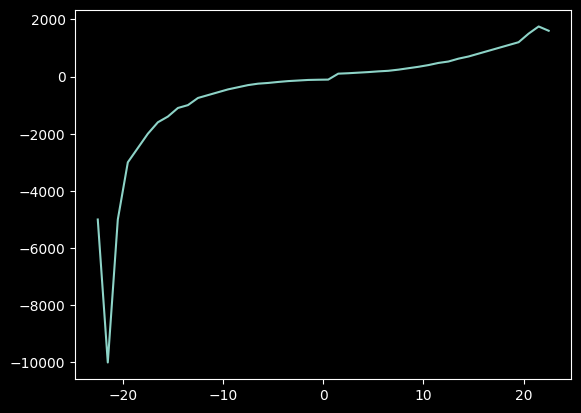

In [12]:
plt.plot(mms_df.sort_index())

In [13]:
mms_df.sort_index()

-22.5    -5000.0
-21.5   -10000.0
-20.5    -5000.0
-19.5    -3000.0
-18.5    -2500.0
-17.5    -2000.0
-16.5    -1600.0
-15.5    -1400.0
-14.5    -1100.0
-13.5    -1000.0
-12.5     -750.0
-11.5     -650.0
-10.5     -550.0
-9.5      -450.0
-8.5      -375.0
-7.5      -300.0
-6.5      -250.0
-5.5      -225.0
-4.5      -190.0
-3.5      -160.0
-2.5      -140.0
-1.5      -120.0
-0.5      -112.5
 0.5      -107.5
 1.5       100.0
 2.5       115.0
 3.5       135.0
 4.5       155.0
 5.5       180.0
 6.5       200.0
 7.5       240.0
 8.5       290.0
 9.5       340.0
 10.5      400.0
 11.5      475.0
 12.5      525.0
 13.5      625.0
 14.5      700.0
 15.5      800.0
 16.5      900.0
 17.5     1000.0
 18.5     1100.0
 19.5     1200.0
 20.5     1500.0
 21.5     1750.0
 22.5     1600.0
dtype: float64

In [14]:
import statsmodels.api as sm

In [15]:
mms_df = mms_df.sort_values()

In [16]:
mms_smoothed = sm.nonparametric.lowess(exog=mms_df.index, endog=mms_df.values, frac=0.2)

In [17]:
mms_smoothed

array([[-2.25000000e+01, -5.00000000e+03],
       [-2.15000000e+01, -1.00000000e+04],
       [-2.05000000e+01, -5.00000000e+03],
       [-1.95000000e+01, -3.00000000e+03],
       [-1.85000000e+01, -2.50000000e+03],
       [-1.75000000e+01, -2.00000000e+03],
       [-1.65000000e+01, -1.60000000e+03],
       [-1.55000000e+01, -1.40000000e+03],
       [-1.45000000e+01, -1.20085443e+03],
       [-1.35000000e+01, -1.02022129e+03],
       [-1.25000000e+01, -8.54967362e+02],
       [-1.15000000e+01, -7.05415443e+02],
       [-1.05000000e+01, -5.71564828e+02],
       [-9.50000000e+00, -4.62247095e+02],
       [-8.50000000e+00, -3.86030275e+02],
       [-7.50000000e+00, -3.22476208e+02],
       [-6.50000000e+00, -2.69885752e+02],
       [-5.50000000e+00, -2.27280489e+02],
       [-4.50000000e+00, -1.94080184e+02],
       [-3.50000000e+00, -1.67061927e+02],
       [-2.50000000e+00, -1.43480501e+02],
       [-1.50000000e+00, -1.18910112e+02],
       [-5.00000000e-01, -6.45517087e+01],
       [ 5.

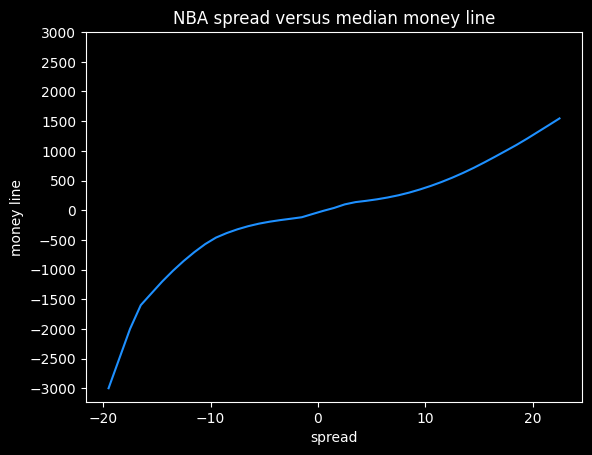

In [18]:
plt.plot(mms_smoothed[3:,0], mms_smoothed[3:,1], color='dodgerblue')
plt.xlabel("spread")
plt.ylabel("money line")
plt.yticks(range(-3000, 3500, 500))
_out = plt.title("NBA spread versus median money line")

-2000 implies a 20/21 chance of winning

In [19]:
20/21

0.9523809523809523

a 1/21 chance of winning should pay out +2000, so the graph should be symmetrical. but you can get +20 on the spread for around +1500, while -20 on the spread will cost you around -2800

TODO: convert money line to the chances of winning


FIXME: you should do smoothing separately on favorites and underdogs. and probably ignore anything between -1.5 and +1.5 because of not much data and weirdness with taking averages 

maybe you need to go back to using the decimal odds, then flip those to american odds after finding the median, so you don't get this weird shit in the middle.

In [ ]:
retail_df = pd.DataFrame(mms_smoothed)
retail_df = retail_df.set_index(0)

In [ ]:
print(retail_df.to_markdown())

|     0 |           1 |
|------:|------------:|
| -22.5 |  -5000      |
| -21.5 | -10000      |
| -20.5 |  -5000      |
| -19.5 |  -3000      |
| -18.5 |  -2500      |
| -17.5 |  -2000      |
| -16.5 |  -1600      |
| -15.5 |  -1400      |
| -14.5 |  -1200.85   |
| -13.5 |  -1020.22   |
| -12.5 |   -854.967  |
| -11.5 |   -705.415  |
| -10.5 |   -571.565  |
|  -9.5 |   -462.247  |
|  -8.5 |   -386.03   |
|  -7.5 |   -322.476  |
|  -6.5 |   -269.886  |
|  -5.5 |   -227.28   |
|  -4.5 |   -194.08   |
|  -3.5 |   -167.062  |
|  -2.5 |   -143.481  |
|  -1.5 |   -118.91   |
|  -0.5 |    -64.5517 |
|   0.5 |    -11.26   |
|   1.5 |     37.4521 |
|   2.5 |     97.7531 |
|   3.5 |    135.84   |
|   4.5 |    157.642  |
|   5.5 |    183.062  |
|   6.5 |    213.915  |
|   7.5 |    251.114  |
|   8.5 |    296.058  |
|   9.5 |    348.961  |
|  10.5 |    408.128  |
|  11.5 |    474.136  |
|  12.5 |    546.835  |
|  13.5 |    626.087  |
|  14.5 |    712.105  |
|  15.5 |    804.696  |
|  16.5 |    901

# The second way, counting values

example of just calculating it for a spread of +3.5. `money_away_won == True` means the away team won outright.

In [22]:
df[df.spread_away_points == 3.5].money_away_won.value_counts() / len(df[df.spread_away_points == 3.5])

money_away_won
False    0.666667
True     0.333333
Name: count, dtype: float64

In [23]:
len(df[df.spread_away_points == 3.5])

309

In [24]:
df[df.spread_home_points == 3.5].money_home_won.value_counts() / len(df[df.spread_home_points == 3.5])

money_home_won
False    0.609244
True     0.390756
Name: count, dtype: float64

as expected, there is a lower volume of games where the home team is getting 3.5 points than away teams.

In [25]:
len(df[df.spread_home_points == 3.5])

238

the difference in winning percentages is interesting but isn't significant. the win % will have a margin of error around 6.5% either way

In [26]:
1/np.sqrt(238)

np.float64(0.06482037235521644)

### doing it with a groupby
need to do home and away lines separately, then combine

In [27]:
home_grouper = df.groupby("spread_home_points")

In [28]:
home_win_pcts = home_grouper.money_home_won.sum()/home_grouper.size()

In [29]:
away_grouper = df.groupby("spread_away_points")

away_win_pcts = away_grouper.money_away_won.sum()/away_grouper.size()

In [30]:
away_win_pcts

spread_away_points
-18.5    1.000000
-17.5    1.000000
-16.5    1.000000
-15.5    0.928571
-14.5    0.875000
           ...   
 18.5    0.000000
 19.5    0.100000
 20.5    0.000000
 21.5    0.000000
 22.5    0.000000
Length: 65, dtype: float64

these should be pretty similar

In [31]:
print((away_win_pcts - home_win_pcts).to_markdown())

|       |            0 |
|------:|-------------:|
| -22.5 | nan          |
| -21.5 | nan          |
| -20.5 | nan          |
| -19.5 | nan          |
| -18.5 |   0          |
| -17.5 |   0.130435   |
| -16.5 |   0.0740741  |
| -15.5 |   0.0505226  |
| -14.5 |  -0.0266393  |
| -13.5 |   0.103159   |
| -13   | nan          |
| -12.5 |  -0.0030303  |
| -12   | nan          |
| -11.5 |   0.044695   |
| -11   |  -1          |
| -10.5 |   0.0384923  |
| -10   |   0          |
|  -9.5 |  -0.0165453  |
|  -9   | nan          |
|  -8.5 |   0.0424409  |
|  -8   |   0.5        |
|  -7.5 |   0.00907119 |
|  -7   |   0.5        |
|  -6.5 |   0.0565968  |
|  -6   |  -0.1        |
|  -5.5 |   0.0509777  |
|  -5   |  -0.0833333  |
|  -4.5 |  -0.00311526 |
|  -4   |   0.583333   |
|  -3.5 |  -0.057423   |
|  -3   |   0.166667   |
|  -2.5 |  -0.00371311 |
|  -2   |  -0.428571   |
|  -1.5 |   0.054962   |
|  -1   |  -0.55       |
|  -0.5 |  -0.5        |
|   0.5 |  -0.5        |
|   1   |  -0.55       |


combining them

In [32]:
numer = home_grouper.money_home_won.sum() + away_grouper.money_away_won.sum()
denom = home_grouper.size() + away_grouper.size()


drop 0.5 and -0.5, they are too rare to worry about

In [33]:
win_ratios = numer/denom

del win_ratios[0.5]
del win_ratios[-0.5]

win_ratios = win_ratios.dropna()

drop whole number values, they are too noisy

In [34]:
win_ratios = win_ratios[win_ratios.index.astype("str").str.endswith(".5")]

In [35]:
print(win_ratios.to_markdown())

|       |         0 |
|------:|----------:|
| -18.5 | 1         |
| -17.5 | 0.888889  |
| -16.5 | 0.941176  |
| -15.5 | 0.890909  |
| -14.5 | 0.894118  |
| -13.5 | 0.889764  |
| -12.5 | 0.835616  |
| -11.5 | 0.832487  |
| -10.5 | 0.789474  |
|  -9.5 | 0.747212  |
|  -8.5 | 0.762763  |
|  -7.5 | 0.745763  |
|  -6.5 | 0.701299  |
|  -5.5 | 0.643892  |
|  -4.5 | 0.6       |
|  -3.5 | 0.641682  |
|  -2.5 | 0.562393  |
|  -1.5 | 0.525535  |
|   1.5 | 0.474465  |
|   2.5 | 0.437607  |
|   3.5 | 0.358318  |
|   4.5 | 0.4       |
|   5.5 | 0.356108  |
|   6.5 | 0.298701  |
|   7.5 | 0.254237  |
|   8.5 | 0.237237  |
|   9.5 | 0.252788  |
|  10.5 | 0.210526  |
|  11.5 | 0.167513  |
|  12.5 | 0.164384  |
|  13.5 | 0.110236  |
|  14.5 | 0.105882  |
|  15.5 | 0.109091  |
|  16.5 | 0.0588235 |
|  17.5 | 0.111111  |
|  18.5 | 0         |


In [36]:
ratios_smoothed = sm.nonparametric.lowess(exog=win_ratios.index, endog=win_ratios.values, frac=0.2)

In [37]:
win_ratios

-18.5    1.000000
-17.5    0.888889
-16.5    0.941176
-15.5    0.890909
-14.5    0.894118
-13.5    0.889764
-12.5    0.835616
-11.5    0.832487
-10.5    0.789474
-9.5     0.747212
-8.5     0.762763
-7.5     0.745763
-6.5     0.701299
-5.5     0.643892
-4.5     0.600000
-3.5     0.641682
-2.5     0.562393
-1.5     0.525535
 1.5     0.474465
 2.5     0.437607
 3.5     0.358318
 4.5     0.400000
 5.5     0.356108
 6.5     0.298701
 7.5     0.254237
 8.5     0.237237
 9.5     0.252788
 10.5    0.210526
 11.5    0.167513
 12.5    0.164384
 13.5    0.110236
 14.5    0.105882
 15.5    0.109091
 16.5    0.058824
 17.5    0.111111
 18.5    0.000000
dtype: float64

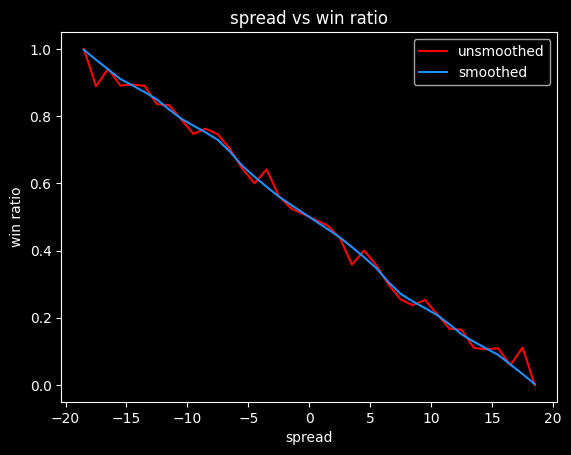

In [38]:
plt.plot(win_ratios.index, win_ratios.values, color='red', label='unsmoothed')
plt.plot(ratios_smoothed[:,0], ratios_smoothed[:,1], color='dodgerblue', label='smoothed')
plt.title("spread vs win ratio")
plt.xlabel("spread")
plt.legend()
_out = plt.ylabel("win ratio")

now convert these to money lines

In [39]:
## this was copy/pasted from the "GOOD ODDS" chapter

def convert_prob_to_money_line(proba):
    if proba > .5:
        money_line = -100 * (proba/(1-proba))
    else:
        money_line = 100 * ((1-proba) / proba)
    return round(money_line)

In [40]:
ml_conv = pd.Series(map(convert_prob_to_money_line, ratios_smoothed[:,1]), index=ratios_smoothed[:,0])


the money lines at the edges are going to be crazy, so I'm dropping > 15.5 points

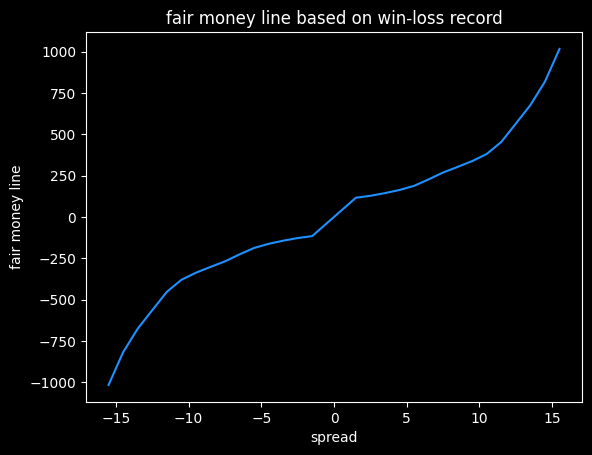

In [41]:
plt.title("fair money line based on win-loss record")
plt.plot(ratios_smoothed[3:-3,0], ml_conv.iloc[3:-3], color='dodgerblue', label='smoothed')
plt.xlabel("spread")
_out = plt.ylabel("fair money line")

In [42]:
fair_moneyline = pd.Series(map(convert_prob_to_money_line, ratios_smoothed[:,1]), index=ratios_smoothed[:,0])

In [43]:
fair_moneyline

-18.5   -37317
-17.5    -2999
-16.5    -1540
-15.5    -1017
-14.5     -819
-13.5     -677
-12.5     -565
-11.5     -454
-10.5     -381
-9.5      -338
-8.5      -303
-7.5      -269
-6.5      -227
-5.5      -188
-4.5      -163
-3.5      -144
-2.5      -128
-1.5      -116
 1.5       116
 2.5       128
 3.5       144
 4.5       163
 5.5       188
 6.5       227
 7.5       269
 8.5       303
 9.5       338
 10.5      381
 11.5      454
 12.5      565
 13.5      677
 14.5      819
 15.5     1017
 16.5     1540
 17.5     2999
 18.5    37317
dtype: int64

In [ ]:
actual_moneyline = pd.Series(retail_df.loc[:,1].values, index=retail_df.index)

In [46]:
fair_vs_actual = pd.DataFrame({"fair": fair_moneyline, "actual": actual_moneyline}).dropna()

In [47]:
fair_vs_actual['diff_amt'] = fair_vs_actual.fair - fair_vs_actual.actual

calculate the overround and such. we need to convert to win probabilities and compare those, since the american odds system is wack

In [ ]:
# copypasted from ep 3 GOOD ODDS

def convert_line(line):
    if line < 0:
        return abs(line)/(abs(line)+100)
    else:
        return 100/(100+line)

In [50]:
fair_vs_actual = fair_vs_actual[abs(fair_vs_actual.index) < 14].copy()

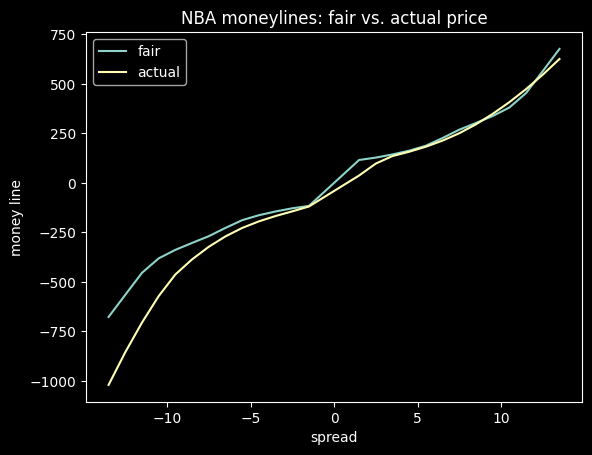

In [51]:
plt.plot(fair_vs_actual.index, fair_vs_actual.fair, label='fair')
plt.plot(fair_vs_actual.index, fair_vs_actual.actual, label='actual')
plt.title("NBA moneylines: fair vs. actual price")
plt.xlabel("spread")
_out = plt.ylabel("money line")
_out = plt.legend()

this is misleading though. I think converting back to probabilities and comparing the ratio of those is cleaner

In [ ]:
fair_vs_actual['fair_pct']   = list(map(convert_line, fair_vs_actual.fair))
fair_vs_actual['actual_pct'] = list(map(convert_line, fair_vs_actual.actual))


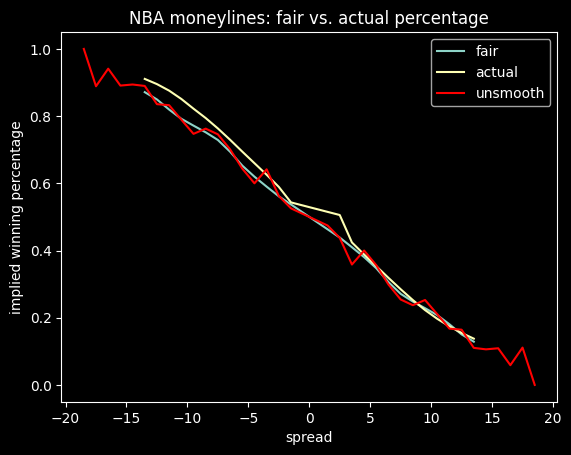

In [73]:
plt.plot(fair_vs_actual.index, fair_vs_actual.fair_pct, label='fair')
plt.plot(fair_vs_actual.index, fair_vs_actual.actual_pct, label='actual')

plt.plot(win_ratios.index, win_ratios.values, label="unsmooth", color='red')
plt.title("NBA moneylines: fair vs. actual percentage")
plt.xlabel("spread")
_out = plt.ylabel("implied winning percentage")
_out = plt.legend()

In [53]:
fair_vs_actual['pct_ratio'] = fair_vs_actual.actual_pct / fair_vs_actual.fair_pct

# TRY TRY AGAIN

new idea -- apply linear fit to the data instead of smoothing

In [77]:
for_training = win_ratios.iloc[2:-2]

In [78]:
for_training

-16.5    0.941176
-15.5    0.890909
-14.5    0.894118
-13.5    0.889764
-12.5    0.835616
-11.5    0.832487
-10.5    0.789474
-9.5     0.747212
-8.5     0.762763
-7.5     0.745763
-6.5     0.701299
-5.5     0.643892
-4.5     0.600000
-3.5     0.641682
-2.5     0.562393
-1.5     0.525535
 1.5     0.474465
 2.5     0.437607
 3.5     0.358318
 4.5     0.400000
 5.5     0.356108
 6.5     0.298701
 7.5     0.254237
 8.5     0.237237
 9.5     0.252788
 10.5    0.210526
 11.5    0.167513
 12.5    0.164384
 13.5    0.110236
 14.5    0.105882
 15.5    0.109091
 16.5    0.058824
dtype: float64

In [84]:
for_training.values

array([0.94117647, 0.89090909, 0.89411765, 0.88976378, 0.83561644,
       0.83248731, 0.78947368, 0.7472119 , 0.76276276, 0.74576271,
       0.7012987 , 0.64389234, 0.6       , 0.6416819 , 0.56239316,
       0.52553542, 0.47446458, 0.43760684, 0.3583181 , 0.4       ,
       0.35610766, 0.2987013 , 0.25423729, 0.23723724, 0.2527881 ,
       0.21052632, 0.16751269, 0.16438356, 0.11023622, 0.10588235,
       0.10909091, 0.05882353])

In [86]:
from sklearn.linear_model import LinearRegression

In [102]:
#for_training.index.to_numpy().reshape(-1,1)

In [92]:
lm = LinearRegression()
lm.fit(for_training.index.to_numpy().reshape(-1,1), for_training.values)

LinearRegression()

the intercept is .5 as we'd like it to be

In [93]:
print(lm.intercept_)

0.49999999999999994


In [94]:
print(lm.coef_)

[-0.02752967]


a 10.5 favorite wins 21% of the time, according to this

In [101]:
lm.predict(np.array([10.5]).reshape(1,-1))



array([0.21093845])

HERE. I'm confused about something. break time

I think it's because there are some outliers, then I'm doing smoothing on the actual odds, so it's weird in the middle?

* change 'actual' to 'retail' so it's clearer in your head

* I think you need to handle underdogs and favorites separately, and avoid the mess in the middle.


make sure 'fair' is what you actually think it is...

UH OH, something weird happened.

this will be > 0, because it is the ratio of actual win percent to the fair 

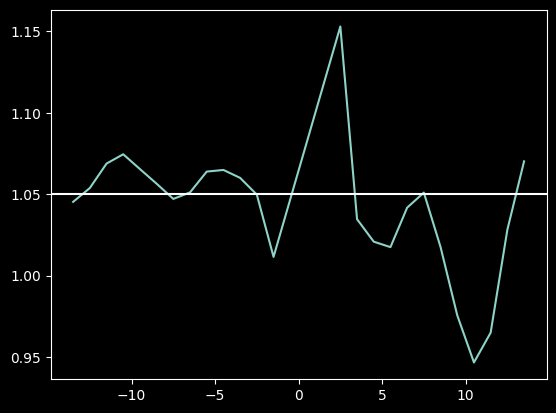

In [56]:
plt.plot(fair_vs_actual.index, fair_vs_actual.pct_ratio)
plt.axhline(1.05, color='white')

I'm baffled why this makes it look like slight faves are a bad deal on the money line relative to other bets, when we know they're not. I'm just mixed up about something 

<Axes: >

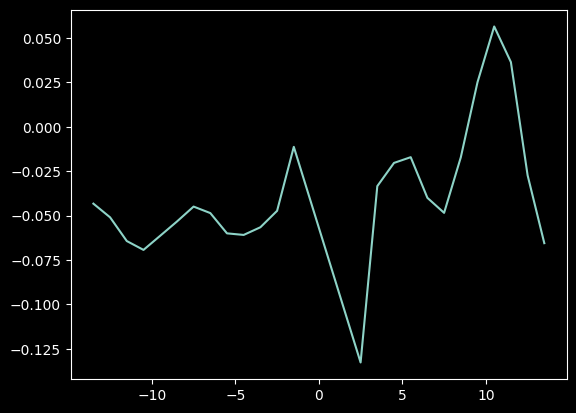

In [61]:
((fair_vs_actual.fair_pct - fair_vs_actual.actual_pct) / fair_vs_actual.actual_pct).plot()

In [58]:
fair_vs_actual

,fair,actual,diff_amt,fair_pct,actual_pct,pct_ratio
-13.5,-677.0,-1020.221293,343.221293,0.871300,0.910732,1.045257
-12.5,-565.0,-854.967362,289.967362,0.849624,0.895284,1.053742
-11.5,-454.0,-705.415443,251.415443,0.819495,0.875840,1.068757
-10.5,-381.0,-571.564828,190.564828,0.792100,0.851094,1.074478
-9.5,-338.0,-462.247095,124.247095,0.771689,0.822142,1.065380
-8.5,-303.0,-386.030275,83.030275,0.751861,0.794251,1.056381
-7.5,-269.0,-322.476208,53.476208,0.728997,0.763300,1.047055
-6.5,-227.0,-269.885752,42.885752,0.694190,0.729646,1.051076
-5.5,-188.0,-227.280489,39.280489,0.652778,0.694452,1.063841
-4.5,-163.0,-194.080184,31.080184,0.619772,0.659957,1.064838
